### Best Mexican Restaurant Expansion Suggestions From Foursquare Data

**1 Introduction/Business Problem**

The owners of an upscale Detroit, MI based Mexican restaurant chain are wishing to expand their chain of restaurants into another Michigan metro area by buying a new restaurant. They are looking at restaurants in nine other metro areas ( Detroit, Kalamazoo, Lansing, Grand Rapids, Flint, Ann Arbor, Midland, Jackson, Battle Creek, Saginaw).   

As part of their decision making process, they would like to know which cities to consider expanding to and a list of restaurants to consider buying. The owners would like some additional data analysis done to assist in making the right decision. Throughout this process, I have been 
asked to find additional data insights to help our clients separate the candidate cities. 

They have provided criteria for the restaurant they would like to purchase.  They have requested that the targets businesses have a Foursquare likes values that are the best in their respective areas and then ranked by their ratings In addition, the restaurant must already be considerd a Tier 2 price level.

**2 Data Section**

As I am working within a narrow time window, I will attempt to locate readily available information.  I will focus on drawing restaurant location and ratings data from the Foursquare API. The developer site for Foursquare is located at: https://developer.foursquare.com/.  That will require establing a
developer account, as the API endpoints require appropriate credentials for accessing the data.  The data required is located in their Places API product.  One segment of the data required will be from their regular calls endpoints, the other segment is located by accessing their premium endpoints.

All Foursquare data will be saved to disk, so that it can be pulled up into this report more readily.

In order to complete the Foursquare data acquisition, location data will need to be added into the mix.  At the onset of the project, I was utilizing US Census Bureau data to gather population and geo data for the respective cities.  That data become unavailable (due to maintenance by the host Census Bureau websitesite (https://www.census.gov/data/datasets/time-series/demo/popest/2010s-total-metro-and-micro-statistical-areas.html) at a crutical point in the process.  I was forced to locate a different source of data, which ended up being a website called Simple Maps https://simplemaps.com/data/us-cities.  That data was downloaded.  

The last bit of data is to compare the chain's existing likes and rating factors to see if there would be any insights gained from resultant data.

**3 Methodology**

3.1 Capstone Section 1: Obtaining and Cleaning Data

The first section of the project was the process of obtaining and cleaning the data.  The detailed description of the programming for this section can be found at https://github.com/bikerhino/Capstone/blob/main/Capstone_1.ipynb.  It includes importing and identifying the required target metro areas.  Obtaining a list of Foursquare restaurants for the target metro areas and 

3.2 Capstone Section 2: Obtaining Premium Foursquare Data 

The second section of the project was taking the Foursquare restaurant list created in Section 1 and matching premium Foursquare data to that list.  The premium data consisted of ratings, pricing tiers and likes values for each restaurant.  The programming for this section can be found at https://github.com/bikerhino/Capstone/blob/main/Capstone_2.ipynb. 

3.3 Capstone Section 3: Merging Data for Sections 1 and 2

Section 3 required merging the two dataframes created in Sections 1.  In particular, the city, restaurant and ratings dataframes are complied in this section.  The programming for this section can be found at https://github.com/bikerhino/Capstone/blob/main/Capstone_3.ipynb

3.4 Capstone Section 4: Data Analysis

Section 4 Data Analysis begins with loading required libraries.

In [1]:
# load libraries

import pandas as pd                                                      # library for data analsysis
import numpy as np                                                       # library to handle data in a vectorized manner  
import matplotlib.pyplot as plt                                          # plotting package 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

Importing the dataframe from Section 3 is the next step.  Analyzing individual feature patterns using visualization was accomplished by plotting the various columns of data.  Likes and likes differentials offer the best form of regression analysis.

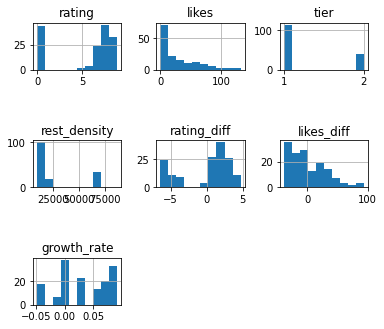

,rating,likes,tier,rest_density,rating_diff,likes_diff,growth_rate
0,7.2,40,1,70122.5,1.3,1.6,0.005
1,8.1,116,2,70122.5,2.2,77.6,0.005
2,7.4,34,1,70122.5,1.5,-4.4,0.005
3,7.2,88,2,70122.5,1.3,49.6,0.005
4,8.2,59,2,70122.5,2.3,20.6,0.005


In [2]:
maxMex = pd.read_csv(r'C:\Users\Jim_2\Desktop\python_projects\maxMex.csv')              # reads cities2 file data
maxMex.describe()
mlr = maxMex[['rating','likes','tier','rest_density','rating_diff','likes_diff','growth_rate']]
mlr.hist()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.show()
mlr.head()

After sampling multiple plot comparisons, the best scatter plot was determined to be using the independent variable of the likes differential and a dependent variable of the Foursquare likes results for each restaurant.  The next step was to create train and test sets. using the aformentioned variables.  

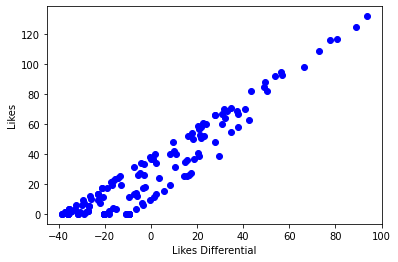

In [3]:
plt.scatter(mlr.likes_diff, mlr.likes,  color='blue')
plt.xlabel("Likes Differential")
plt.ylabel("Likes")
plt.show()
mex = np.random.rand(len(maxMex)) < 0.8
train = mlr[mex]
test = mlr[~mex]

**4 Results**

Making predictions based off of a singular regression model was the selected model as that was the most obvious data selection choice.  In
accordance with building such a model, I needed to arrange a linear regression model using to selected independent and dependent variables.  Utilizing the training and test sets, I established the single linear coefficients and intercept for the model.  The regression plot is shown below.

Coefficients:  [[0.997309]]
Intercept:  [28.3454791]


Text(0, 0.5, 'Likes')

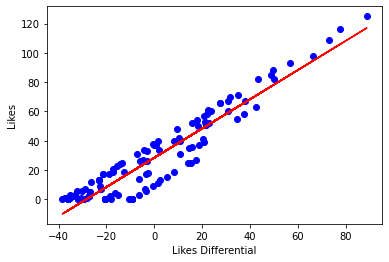

In [4]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['likes_diff']])
train_y = np.asanyarray(train[['likes']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.likes_diff, train.likes,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Likes Differential")
plt.ylabel("Likes")

Text(0, 0.5, 'Likes')

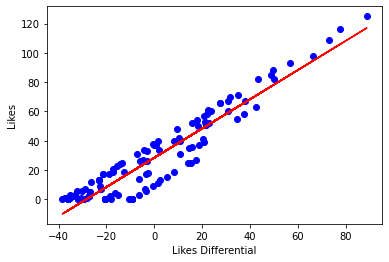

In [5]:
plt.scatter(train.likes_diff, train.likes,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Likes Differential")
plt.ylabel("Likes")

Accuracy and evaluation was completed using mean absolute error, residual sum of squares and obtaining a R2 score.  They are displayed below.  The determined results were satisfactory.

In [6]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['likes_diff']])
test_y = np.asanyarray(test[['likes']])
test_y_ = regr.predict(test_x)

print("\nMean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_),'\n')


Mean absolute error: 9.48
Residual sum of squares (MSE): 108.45
R2-score: 0.93 



To fulfill the restaurant owners' requirements a visual inspection of the plot was used to select the thresholds for providing target restaurants for the client.  An initial slice of 5 targets will be provided based upon the criteria.  The minimum likes differential was placed at a greater than 45 value and the like value was placed at a greater than 70 factor.  In addition, restaurants with a price tier of 1 were filtered from the results, as well.  The leads were then sorted by their respective Foursquare ratings.  The target suggestions are below.  Should the owners require more results, they can be easily provided.

In [7]:
likes_leads = maxMex[(maxMex['likes_diff'] > 45) & (maxMex['likes'] > 70) & (maxMex['tier'] > 1)]
likes_leads2 = likes_leads.sort_values(by='rating', ascending=False)
picks = likes_leads2[0:5]
picks

,name,city,rating,likes,tier,rest_density,rating_diff,likes_diff,growth_rate
104,Maiz Mexican Cantina,Ann Arbor,8.5,98,2,14648.5,2.9,66.2,0.0650
11,Mexican Village,Detroit,8.4,92,2,70122.5,2.5,53.6,0.0050
39,On The Border Mexican Grill & Cantina,Grand Rapids,8.3,109,2,14507.5,2.4,72.9,0.0917
1,Mexican Village Restaurant,Detroit,8.1,116,2,70122.5,2.2,77.6,0.0050
36,On The Border Mexican Grill & Cantina,Grand Rapids,8.1,117,2,14507.5,2.2,80.9,0.0917


**5 Discussion**

The project was fairly basic in nature due to the limited time that was available to complete the project.  Utilizing the Foursquare data has limits, especially in the capacity that was selected.  There are some obvious limitations to the data. Not every restaurant has rankings and likes values.  Not every metro area is going to utilize Foursquare equally.  In order to manage the differences between metro areas, the rating and likes differentials were established to generate a more balanced comparison between the metro areas.  To obtain the differentials an average was taken for each metro area and the average was subtracted from each restaurant's respective values.  Relying upon Foursquare ratings and likes provides a fairly small number of reviews for each restaurant. In order to effectively use this type of data, one would need to have significantly more revues to gain a much broader and reliable dataset.